# Workflows de Análise de Dados e Geoestatística

## Módulo 4 - Construindo um Model de Árvore

O objetivo deste módulo e criar um modelo linear (regressão linear simples e múltipla)

### Imports

In [1]:
# paths
import os

# pandas
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

# model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# configuring plots of seaborn
sns.set_style("ticks", {'axes.grid':False})
sns.set_context("talk") 

### Helper functions

In [3]:
# directories
def get_directories():
    """
      function returns a dict with directories used to access files and data
    """

    # getting working paths
    CURRENT_DIR = os.path.dirname(os.path.realpath('__file__'))
    PARENT_DIR = os.path.dirname(CURRENT_DIR)
    DATA_DIR = os.path.join(PARENT_DIR, 'data')
    
    dirs = {
        "CURRENT_DIR" : CURRENT_DIR,
        "PARENT_DIR" : PARENT_DIR,
        "DATA_DIR" : DATA_DIR
    }

    return (dirs)


# metadados sobre dataframe
def meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)

In [4]:
get_directories()

{'CURRENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\modulo_4',
 'PARENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data',
 'DATA_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\data'}

In [5]:
# importing data

data_dirs = get_directories()
df_jura = pd.read_csv(os.path.join(data_dirs["DATA_DIR"],"silver_jura.csv"))
df_jura.head(10)

,vlLocX,vlLocY,descLanduse,descUnit,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,status,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn,descAnomalyZn
0,1.932,1.004,campo,argoviano,0.135,4.520,15.08,5.24,37.00,32.56,NaN,0.00,0.14,0.02,0.03,0.28,0.04,normal
1,1.824,0.999,campo,argoviano,0.165,3.752,18.60,7.08,56.40,44.00,NaN,0.00,0.07,0.06,0.07,0.68,0.12,normal
2,1.883,1.176,campo,argoviano,0.195,3.920,21.80,7.52,49.60,43.20,NaN,0.01,0.10,0.12,0.10,0.56,0.10,normal
3,1.837,1.037,campo,argoviano,0.215,3.880,23.00,8.16,46.80,44.00,NaN,0.01,0.09,0.14,0.11,0.51,0.12,normal
4,3.768,2.775,floresta,kimmeridgiano,0.220,10.800,26.32,17.52,31.88,45.20,NaN,0.02,0.60,0.20,0.37,0.11,0.14,normal
5,1.839,0.995,campo,argoviano,0.225,4.240,24.88,10.12,55.60,56.00,NaN,0.02,0.12,0.17,0.16,0.68,0.26,normal
6,2.537,3.768,campo,argoviano,0.230,3.792,18.20,5.68,26.84,32.08,NaN,0.02,0.08,0.04,0.05,0.04,0.03,normal
7,2.502,3.988,campo,argoviano,0.240,3.760,18.92,5.20,22.36,32.24,NaN,0.03,0.08,0.06,0.03,0.02,0.04,normal
8,1.842,0.989,campo,argoviano,0.240,4.520,27.96,11.32,52.40,56.40,NaN,0.03,0.14,0.26,0.20,0.62,0.26,normal
9,1.897,1.220,campo,argoviano,0.260,3.480,16.24,4.76,27.00,27.20,NaN,0.04,0.04,0.03,0.01,0.05,0.01,normal


In [6]:
meta_df(df_jura)

,dtypes,nmissing,missing%,nunique,nunique%,size
vlLocX,float64,0,0.00,238,94.82,251
vlLocY,float64,0,0.00,241,96.02,251
descLanduse,object,0,0.00,4,1.59,251
descUnit,object,0,0.00,5,1.99,251
vlCadmium,float64,0,0.00,209,83.27,251
vlCobalt,float64,0,0.00,172,68.53,251
vlChromium,float64,0,0.00,198,78.88,251
vlNickel,float64,0,0.00,213,84.86,251
vlLead,float64,0,0.00,192,76.49,251
vlZinc,float64,0,0.00,183,72.91,251


In [7]:
grade_features = ["vlCadmium", "vlCobalt", "vlChromium", "vlNickel", "vlLead", "vlZinc"]

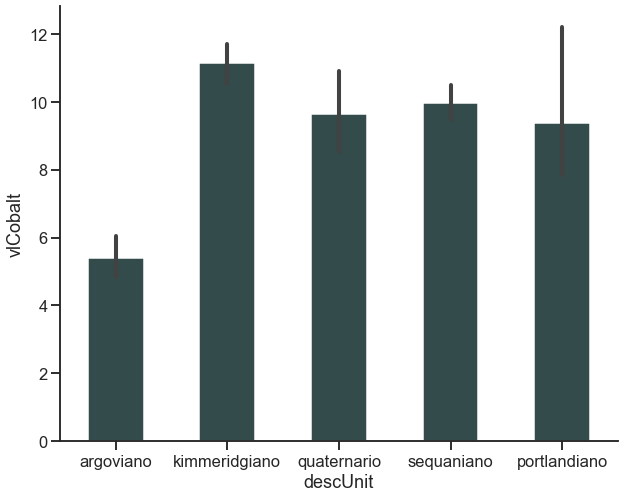

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_jura['descUnit'], y=df_jura['vlCobalt'], color='darkslategray', width=0.5)
sns.despine()
plt.show()

In [9]:
def q5(x):
  return x.quantile(.5)

In [10]:
df_jura[df_jura['descUnit']=='argoviano']['vlCadmium'].quantile(.5)

0.5925

In [11]:

df_g = df_jura.groupby(by=['descUnit']).agg({
        'vlCadmium': [np.mean, q5],
        'vlCobalt': [np.mean, q5],
        'vlChromium': [np.mean, q5],
        'vlNickel': [np.mean, q5],
        'vlLead': [np.mean, q5],
        'vlZinc': [np.mean, q5],
       }
  ).reset_index()

df_g

descUnit vlCadmium           vlCobalt        vlChromium         \
                      mean      q5       mean     q5       mean     q5   
0      argoviano  1.163360  0.5925   5.409520   4.52  28.600000  27.34   
1  kimmeridgiano  1.352639  1.3050  11.129639  11.80  35.673735  36.20   
2   portlandiano  1.850000  1.6450   9.373333   8.08  39.266667  39.20   
3    quaternario  1.123212  1.0200   9.649462   9.62  34.396923  35.46   
4     sequaniano  1.504952  1.2150   9.975238  10.12  39.972698  38.72   

    vlNickel            vlLead           vlZinc        
        mean     q5       mean    q5       mean    q5  
0  11.713600  10.52  38.856800  36.4  60.139200  47.2  
1  25.138795  24.96  56.838072  51.2  77.144578  74.4  
2  23.720000  20.32  48.026667  44.0  66.666667  65.6  
3  18.480769  19.82  52.040769  47.2  76.450000  75.6  
4  20.154921  20.24  62.949841  50.4  82.747302  79.6

In [12]:
df_jura[df_jura['descUnit'] == 'argoviano'].describe(percentiles=[.5,.75])

,vlLocX,vlLocY,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2.460640,2.981320,1.163360,5.409520,28.600000,11.713600,38.856800,60.139200,0.35240,0.189400,0.314800,0.21720,0.309600,0.305400
std,0.638061,1.712604,1.302444,2.085042,9.517801,5.492248,10.952058,32.148781,0.34827,0.139275,0.266927,0.17689,0.237418,0.316339
min,1.241000,0.734000,0.135000,3.124000,15.080000,4.200000,21.600000,27.200000,0.00000,0.020000,0.020000,0.00000,0.010000,0.010000
50%,2.377500,3.873500,0.592500,4.520000,27.340000,10.520000,36.400000,47.200000,0.20500,0.140000,0.235000,0.16500,0.245000,0.170000
75%,2.914000,4.696500,1.402500,6.180000,34.390000,14.870000,46.300000,61.100000,0.62000,0.225000,0.487500,0.26750,0.507500,0.340000
max,3.800000,5.130000,5.129000,10.320000,52.400000,22.920000,64.400000,145.600000,1.00000,0.540000,0.940000,0.63000,0.780000,0.980000


### Tree model

In [13]:
#   helper function to score predictions and true values on classifier models

def metrics(yte, ypr):
  """
    Function that summarizes classification metrics.
    * parameters:
      yte -> y_test, actual data
      ypr -> y_pred, predictions
  """

  print('| METRICS |') 
  print(25 * '-')
  print('accuracy:\t',  round(accuracy_score(yte, ypr), 3)) # how many we got it right?
  print('precision:\t', round(precision_score(yte, ypr), 3)) # tp / tp + fp -> from retrieved samples, how many are relevant? 
  print('recall:\t\t',  round(recall_score(yte, ypr), 3)) # tp / tp + fn -> how many relevant samples are retrieved?
  print('f1 score:\t',  round(f1_score(yte, ypr), 3))

#### Defining our target variable: is the sample from the Argovian?

In [14]:
df_jura['descUnit'].value_counts(normalize=True)

kimmeridgiano    0.330677
sequaniano       0.250996
quaternario      0.207171
argoviano        0.199203
portlandiano     0.011952
Name: descUnit, dtype: float64

#### splitting datasets (the _train_test_split_ function)

In [15]:
#   train - test split

#   X represent features whereas y is the target variable
X_train, X_test, y_train, y_test = train_test_split(df_jura[grade_features], df_jura['descUnit'], random_state=1, test_size=.30)

#   simple pipeline that tranforms target variable in binary
#   in this case: is the sample from the Argovian? 1 - yes; 0 - no

y_train = y_train.map(lambda x: 1 if x == 'argoviano' else 0)
y_test = y_test.map(lambda x: 1 if x == 'argoviano' else 0)

#### checking splits

In [16]:
y_train.value_counts(normalize=True)

0    0.805714
1    0.194286
Name: descUnit, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

0    0.789474
1    0.210526
Name: descUnit, dtype: float64

#### Modelling

In [18]:
# making predictions!!

# creating a classifier
clf = DecisionTreeClassifier()

# fitting model to train features and target
clf.fit(X=X_train, y=y_train)

# making predictions with test features
y_pred = clf.predict(X=X_test)

In [19]:
df_comparison = pd.DataFrame(columns=['y_test','y_pred'])
df_comparison['y_test'] = y_test
df_comparison['y_pred'] = y_pred

df_comparison.head(50)

,y_test,y_pred
67,0,0
250,1,1
230,0,0
161,1,1
91,0,0
224,0,0
58,1,0
234,0,0
180,0,0
4,0,0


In [20]:
metrics(y_test, y_pred)

| METRICS |
-------------------------
accuracy:	 0.855
precision:	 0.857
recall:		 0.375
f1 score:	 0.522


In [21]:
fpr, tpr, tr = roc_curve(y_test, y_pred)

In [22]:
tpr

array([0.   , 0.375, 1.   ])

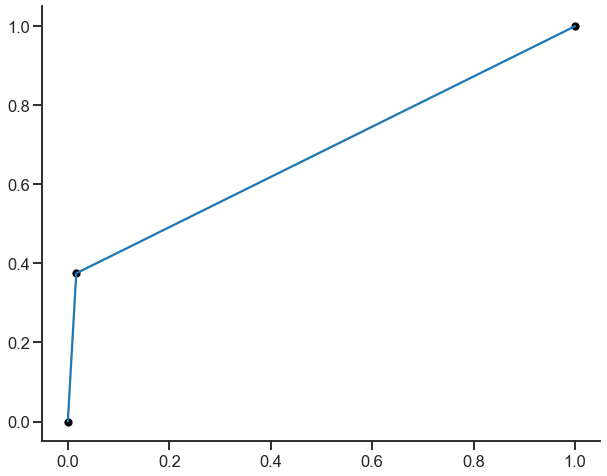

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(x=fpr, y=tpr)
sns.scatterplot(x=fpr, y=tpr, color='black')
sns.despine()

In [24]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)